In [58]:
# This notebook read the network data and compare statistics between genomic feat network and
# genomic+functional feat network
# Author: Yiyun

import pandas as pd
from scipy import stats
import seaborn as sns

In [59]:
# read input for genomic/ genomic+functional network.
df_wceres = pd.read_csv('../out/deg1_default_node_table.csv')
df_wceres_edge = pd.read_csv('../out/deg1_default_edge.csv')
df_woceres = pd.read_csv('../out/non-CERES_default_node.csv')

In [60]:
# Calculate the neighbor numbrr for each node = #edge - #loop*2 -#multiedged pairs
wceres_col = df_wceres['EdgeCount'] - 2* (df_wceres['SelfLoops']) - df_wceres['PartnerOfMultiEdgedNodePairs']
woceres_col = df_woceres['EdgeCount'] - 2* (df_woceres['SelfLoops']) - df_woceres['PartnerOfMultiEdgedNodePairs']

# Validate #averege neighbors
ave_nnei_w = sum(wceres_col)/len(df_wceres)
print(f'Genomic+functional average number of neighbors is: {ave_nnei_w}')
ave_nnei_wo = sum(woceres_col)/len(df_woceres)
print(f'Genomic only average number of neighbors is: {ave_nnei_wo}')

Genomic+functional average number of neighbors is: 5.095785440613027
Genomic only average number of neighbors is: 1.7318435754189945


Note: The average neighbor number calucated for genomic+function network is 5.096, differnt from 5.088 reported by cytoscape

In [61]:
# 2 sided t test for comparing #neigbors between genomes+features and genomeics only
statistics, pval = stats.ttest_ind(wceres_col,woceres_col)

print('p value for average number of neighbors between genomic+functional and genomics only network is:{:.3e}'.format(pval))


p value for average number of neighbors between genomic+functional and genomics only network is:2.049e-24


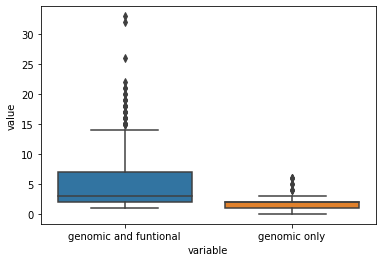

In [44]:
# Look at the plot
df_plt_edge = pd.DataFrame({'genomic and funtional': wceres_col,'genomic only': woceres_col})
df_plt_edge = pd.melt(df_plt_edge)
ax = sns.boxplot(x="variable", y="value", data=df_plt_edge)